In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston = pd.DataFrame(boston_dataset.data, 
                      columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X = boston
y = boston_dataset.target

X = (X - X.mean()) / X.std()
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print(lin_model.intercept_)

22.661709052379685


In [12]:
print(len(lin_model.coef_))
print(lin_model.coef_)

13
[-1.13926379  1.20462721  0.35938164  0.4518972  -2.22433264  2.78589765
  0.01321065 -3.11864681  3.11199414 -2.29074209 -2.16577984  0.71990917
 -3.55891144]


In [13]:
y_pred = lin_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
mse = np.sqrt(mean_squared_error(y_pred, y_test))
r2 = r2_score(y_pred, y_test)
print(mse)
print(r2)

4.77494211820574
0.5355784157437169


In [16]:
print(y_pred)

[24.95458686 25.00388327 25.36172983 29.15332919 27.41549235 13.93516611
 22.88830653 33.05515946 20.46365673 15.27257843  9.7997947  19.65205709
 22.48381603 25.24999664 30.28467878 22.96929151 22.68522211 40.16578132
 20.00037787 20.23309201 22.78951627 20.34751272 33.45919351 20.10369678
 13.78946872 15.66324398 24.14855905 17.27454713 15.32077242 20.07134272
 20.46495051 18.80077172 19.37875333 29.41628794 17.44245532 16.26876684
 21.27650861 28.69252952 33.7525294  27.81791566 20.58810848 18.95454012
 21.0980256  17.83593499 30.87570789 14.59956301 24.9755833  19.10668667
 39.47209655 20.76889375 30.4208059  24.02159438 27.78796791 19.96065899
 24.27111549 24.68327495 15.88812389 21.24151935 21.46000056 20.02271356
 19.17638849 28.99459974 16.32005917 25.03369638 14.28669372 12.4358512
 14.15287264 13.70468026 39.88031519 24.95230485 13.82184433 17.08626657
 34.67247628 33.95380318 22.91348494 37.24619318 25.35207699 15.26048983
 20.65737727 23.49965627 34.76800069 24.03747963 21.

In [17]:
print(y_test)

[22.7 29.6 50.  25.  24.8 13.3 25.  36.4 24.5 11.   8.7 19.4 16.1 24.2
 34.9 17.4 20.4 50.  17.1 19.1 25.  16.8 31.7 24.3 13.5 11.7 23.4 10.2
  9.6 20.6 20.1 12.1 18.4 22.5 19.6 17.5 21.  23.3 28.5 24.5 20.4 20.8
 18.8 23.2 32.9 11.5 28.7 18.5 43.5 13.1 23.6 23.  23.9 19.5 24.4 23.9
 21.9 16.7 24.5 15.2 20.4 23.6 20.  22.9 13.4 13.6  9.5 14.5 50.  25.
 14.  19.5 31.  32.  23.1 21.9 26.5 16.6 20.9 23.  39.8 20.1 21.7 23.7
 31.5 22.6 19.5 19.9  7.2 21.9  8.8 15.1 19.8 43.8 14.1 38.7 24.4 23.7
 24.7 37.3  7.2 17.5]


In [18]:
boston['MEDV'] = boston_dataset.target
correlation_matrix = boston.corr().round(2)

In [19]:
import seaborn as sns

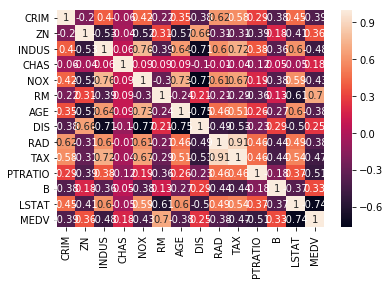

In [20]:

sns.heatmap(data=correlation_matrix, annot=True)

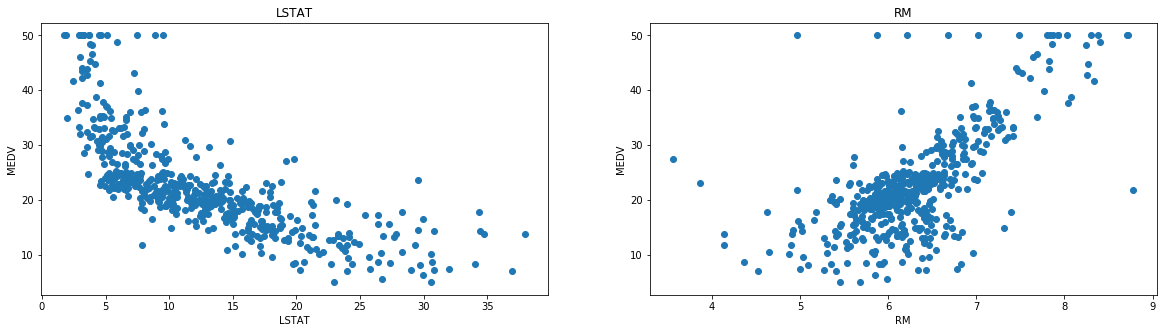

In [21]:
plt.figure(figsize=(20,5))
features = ['LSTAT', 'RM']
target = boston['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [34]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT','RM'])
Y = boston['MEDV']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [36]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
#model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print("The performance for training set: ")
print("RMSE is : ", rmse)
print("R2 is : ", r2)

The performance for training set: 
RMSE is :  5.6127765955876585
R2 is :  0.6841804779756409
